In [1]:
#%matplotlib inline                                                              #def in Anaconda's version of Python 3.7+
#%matplotlib notebook                                                            #for interactive plot
import math
import time
import random
import matplotlib
import importlib
import numpy                   as np
import pandas                  as pd
import matplotlib.pyplot       as plt
import matplotlib.font_manager as fm
import matplotlib.ticker       as mtick
import psutil
p = psutil.Process()
# Bind to P-core threads (0 to 11)
p.cpu_affinity([0, 1, 2, 3])
    
from matplotlib.patches        import Polygon
from numpy.random              import normal
from numpy                     import mean, std
from scipy                     import interpolate, stats
from scipy.stats               import norm, kde, gamma, beta, gaussian_kde
from scipy.interpolate         import splev, splrep, UnivariateSpline, CubicSpline
from scipy.integrate           import quad
from scipy.optimize            import curve_fit
from mpl_toolkits.mplot3d      import Axes3D
from matplotlib.colors         import LogNorm

from MC_Hoon                   import *
import MC_Hoon
importlib.reload(MC_Hoon)
from MC_Hoon                   import *

font                                = fm.FontProperties(family = 'Gill Sans', fname = 'GillSans.ttc', size = 20)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype']  = 42

#Hides the top and rightmost axis spines from view for all active figures and their respective axes.
def hide_spines(intx = False, inty = False):                                      
    figures = [x for x in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]  #Retrieve a list of all current figures.
    if (plt.gca().get_legend()):
        plt.setp(plt.gca().get_legend().get_texts(), fontproperties = font) 
        plt.setp(plt.gca().get_legend().get_title(), fontproperties = font) 
    for figure in figures:
        for ax in figure.canvas.figure.get_axes():                               #Get all Axis instances related to the fig
            ax.spines['right'].set_color('none')                                 #Disable spines.
            ax.spines['top'].set_color('none')
            ax.xaxis.set_ticks_position('bottom')                                #Set ticks position.
            ax.yaxis.set_ticks_position('left')
            #ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
            for label in ax.get_xticklabels() :                                  #Set font in ticks.
                label.set_fontproperties(font)
            for label in ax.get_yticklabels() :
                label.set_fontproperties(font)
            #ax.set_xticklabels(ax.get_xticks(), fontproperties = font)
            ax.set_xlabel(ax.get_xlabel(), fontproperties = font)                #Set font in labels.
            ax.set_ylabel(ax.get_ylabel(), fontproperties = font)
            #ax.set_title(ax.get_title(),   fontproperties = font)
            if (inty):
                ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
            if (intx):
                ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
                
def show(nm = "", a = 0, b = 0):                                                 #Save figure in a pdf file.
    hide_spines(a, b)
    #ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
    #plt.yticks([1,1e-2,1e-4,1e-6,1e-8,1e-10,1e-12], labels)
    #ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
    if (len(nm) > 0):
        plt.savefig(nm+".pdf", bbox_inches = 'tight')                            #Removes all of the extra white space
    #plt.show()                                                                  #Unnecessary in iPhyton or Jupyter


ntimesTRAP  = 0                #No trapping
ntimesDEA   = 1/20             #1/20 scaling (Kai 2023)

new_samples = 10**3           #10**5: 5 min
t_max       = 10**9                                #fs
e_cutoff    = 0.2                                  #0.0256 Kai(2005)
aniso_fact  = 1                                    #0: iso.scattering
scat_fact   = 1

kwargs      = dict(histtype='stepfilled', alpha=0.4, density=False, edgecolor='black')
    
(total_int, capture_int, inelastic_int, inel_vec, ion_frac_int, losses, gammas, elastic_int, others_int, EAD_int, trap_int, \
DEA_int, vT_int, vT2_int, vL_int, vL2_int, v2_int, v13_int, v213_int, v13L_int, v3_int, vT_gint, vT2_gint, vL_gint,        \
vL2_gint, v2_gint, v13_gint, v213_gint, v13L_gint, v3_gint, inferior_int, res, res1, res2, res3, dosd_int, extra_int1,     \
nist_int, ELOSS_int, DOS_int, EXC_loss_int, exc_el_int, exc_sp_int, Photo_eff_Mint, Photo_eff_Tint, elastic_ADCS_int, Pt_reflect_int) \
= processData(ntimesTRAP, ntimesDEA, scat_fact)

#energy_plot = np.linspace(0, 100, 500)
#energy_plot = np.linspace(0, 1000, 5000)

EELS14_data  = np.loadtxt("EELS/EELS_Data_14.csv",  delimiter=",")
EELS19_data  = np.loadtxt("EELS/EELS_Data_19.csv",  delimiter=",")
EELS100_data = np.loadtxt("EELS/EELS_Data_100.csv", delimiter=",")

Inelastic (Vib) MFP: 3.94 nm (For 14.3 eV)
Elastic MFP        : 0.44 nm (For 14.3 eV)


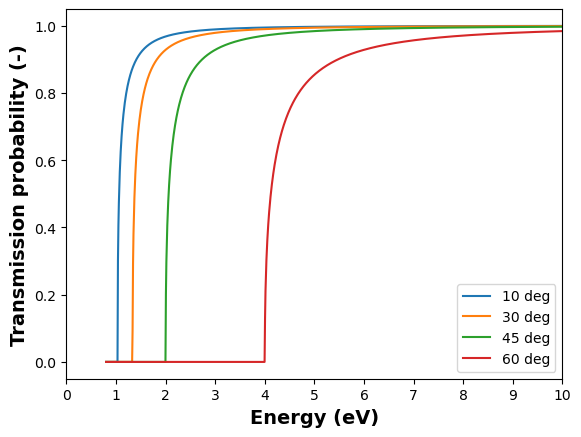

In [2]:
E_b       = 1#0.8                        #escape barrier (electron affinity)
e_del     = 0#0.6
energy    = np.linspace(0.8,10,1000).tolist()
theta_deg = [10, 30, 45, 60]
theta     = [x * np.pi/180 for x in theta_deg]

for i in range(len(theta)):
    T_ds=[]
    for j in range(len(energy)):
        if E_b < (energy[j]+e_del)*(np.cos(theta[i]))**2:
            T_d = 4 *      np.sqrt(1 - (E_b / ((energy[j] + e_del) * (np.cos(theta[i]))**2))) \
                /     (1 + np.sqrt(1 - (E_b / ((energy[j] + e_del) * (np.cos(theta[i]))**2))))**2
        else:
            T_d = 0
        T_ds.append(T_d)
    plt.plot(energy, T_ds, label = str(theta_deg[i]) + " deg")

#plt.xscale('log')
plt.xlabel("Energy (eV)",                  fontsize = 14, weight='bold')
plt.ylabel("Transmission probability (-)", fontsize = 14, weight='bold')
plt.xlim(0, 10)
plt.xticks(np.linspace(0,10,11))
plt.legend()
plt.show()

In [3]:
#Energy loss rate
ERR_eV  = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
ERR_nm  = [0.9, 1.0, 1.7, 2.0, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 6.0, 8.0, 9.0, 9.2, 9.4, 9.6, 9.8, 9.9, 10.0]
ERR_spl = splrep(ERR_eV, ERR_nm)
ERR_int = lambda energy: energy / splev(energy, ERR_spl)                #eV/nm

ERR_int(0.35)

0.18797334996630907

In [4]:
"""
plt.figure(1)
plt.plot(EELS14_data[:11, 0], EELS14_data[:11, 1]*1, 'b--')#, label='Michaud et al. (1991): EELS 14.3 eV case')
plt.plot(EELS14_data[11:, 0], EELS14_data[11:, 1]*1, 'b--')#, label='Michaud et al. (1991): EELS 14.3 eV case')

plt.figure(2)
plt.plot(EELS19_data[:12, 0], EELS19_data[:12, 1]*1, 'r-')#, label='Michaud et al. (1991): EELS 14.3 eV case')
plt.plot(EELS19_data[12:, 0], EELS19_data[12:, 1]*1, 'r-')#, label='Michaud et al. (1991): EELS 14.3 eV case')
"""

"\nplt.figure(1)\nplt.plot(EELS14_data[:11, 0], EELS14_data[:11, 1]*1, 'b--')#, label='Michaud et al. (1991): EELS 14.3 eV case')\nplt.plot(EELS14_data[11:, 0], EELS14_data[11:, 1]*1, 'b--')#, label='Michaud et al. (1991): EELS 14.3 eV case')\n\nplt.figure(2)\nplt.plot(EELS19_data[:12, 0], EELS19_data[:12, 1]*1, 'r-')#, label='Michaud et al. (1991): EELS 14.3 eV case')\nplt.plot(EELS19_data[12:, 0], EELS19_data[12:, 1]*1, 'r-')#, label='Michaud et al. (1991): EELS 14.3 eV case')\n"

In [5]:
%%time
#Reproduce EELS 14.3eV & 19eV cases (Michaud, 1991)

#################################################################
#################################################################
#################################################################

#WHILE LOOP IN THE FUNCTION MUST BE MODIFIED BEOFRE RUN THIS CELL

#################################################################
#################################################################
#################################################################

from MC_Hoon                   import *
import MC_Hoon
importlib.reload(MC_Hoon)
from MC_Hoon                   import *


new_samples   = 10**5             #10**5: 21 min(14.3 eV), 37 min(19 eV)

#elist         = [14.3]
elist         = [19]
#elist         = [100]

if elist[0] == 14.3 or elist[0] == 19:
    layers        = [28]
else:
    layers        = [1]
    
thicknesses   = [x*1.76*0.1 for x in layers]                    #1.76 Angstrom (Michaud, 1987) * 28 layers (Michaud, 1991) = 4.93 nm

esi_all       = np.zeros((len(thicknesses), len(elist)))
esi_specific  = np.zeros((len(thicknesses), len(elist)))
EELS_data_all = np.zeros((len(thicknesses), len(elist)), dtype=object)

for j in range(len(thicknesses)):
    thickness = thicknesses[j]
    #water_mass_density   = 0.99819
    #water_number_density = water_mass_density / 18.01528 * 6.022e23 #per cm^3 (=/1e21 nm^3)       #liquid
    water_number_density = 3.15e22                                                                 #low density ASW, (Michaud, 1987, 2003)
    energy_shift         = 0
            
    Q_total                           = []
    cosine_total                      = []
    E_ion_total                       = []
    E_ion_loss_total                  = []
    E_inel_loss_total                 = []
    E_exc_loss_total                  = []
    E_loss_EELS_back_total            = []
    E_loss_EELS_back_specific_total   = []    
  
    for en_ind in range(len(elist)):
        energy                        = elist[en_ind]
        energy_ini                    = energy
        
        pos_coord           = []
        pos_coord_specific  = []
        coll_data           = []
        #EELS_data           = []
        col_num             = []
        
        #"""
        Q_all                         = []
        cosine_all                    = []
        E_ion_all                     = []
        E_ion_loss_all                = []
        E_inel_loss_all               = []
        E_exc_loss_all                = []
        T_d_data_all                  = []
        
        E_loss_EELS_back_all              = []
        E_loss_EELS_back_specific_all     = []
        E_loss_EELS_back_specific_exc_all = []
        E_loss_EELS_back_specific_ion_all = []
        #"""
        
        EELS_back_coll_all    = 0
        EELS_through_coll_all = 0
        
        energy_losses        = []
        secondaries          = []
        EELS_second_energies = []
        
        for i in range(new_samples):
            (pos, depth, tot_distance, dist_travel, tot_t_elapsed, t_travel, energy_evol, inelastic_coll, trap_coll, excitation_coll,    \
             ionization_coll, cap_coll, DEA_coll, TNA_EAD_coll, elastic_coll, ion_init, ion_loss, count_all, count_cap, therm_num,       \
             ifcaptured, energy_incident, energy_loss, secondary, DOSD_coll, excitation_EAD_coll, meanDOSD, eloss_inelastic_per_sample,  \
             Q_data, cosine_data, E_ion_data, E_ion_loss_data, E_inel_loss_data, E_exc_loss_data, e_aq_Gval_Ion, e_aq_Gval_Exc_EAD,      \
             e_aq_Gval_TNA_EAD, excitation_EAD, energy_second, t_ionization, t_excitation, t_TNA_EAD, TNA_EAD, MT_data, pos_evol,\
             EELS_back_coll, EELS_through_coll, E_loss_EELS_back, E_loss_EELS_back_specific, surface_reflect_coll, EELS_second_coll, \
             EELS_second_energy, pos_evol_specific, E_loss_EELS_back_specific_exc, E_loss_EELS_back_specific_ion, T_d_data) \
            = run_MC(energy, t_max, water_number_density, aniso_fact, capture_int, inelastic_int, exc_el_int, exc_sp_int, Photo_eff_Mint, \
                     Photo_eff_Tint, total_int, inel_vec, losses, gammas, ion_frac_int, energy_shift, e_cutoff, res, res1, res2, res3,    \
                     dosd_int, extra_int1, nist_int, ELOSS_int, DOS_int, EXC_loss_int, others_int, thickness, energy_ini, elastic_ADCS_int,\
                     Pt_reflect_int)

            pos_coord.append(pos_evol)
            pos_coord_specific.append(pos_evol_specific)
            pos_coord_specific = [elem for elem in pos_coord_specific if elem]
            coll_data.append([inelastic_coll, trap_coll, excitation_coll, ionization_coll, TNA_EAD_coll, elastic_coll, \
                              DEA_coll, DOSD_coll, excitation_EAD_coll, surface_reflect_coll, EELS_second_coll])
                        
            EELS_back_coll_all    += EELS_back_coll
            EELS_through_coll_all += EELS_through_coll
            energy_losses         += energy_loss
            secondaries           += energy_second
            EELS_second_energies  += EELS_second_energy
            
            col_num.append(len(pos_evol))
            
            #""" Sum all samples' data after each iteration
            Q_all                         += Q_data
            cosine_all                    += cosine_data
            E_ion_all                     += E_ion_data
            E_ion_loss_all                += E_ion_loss_data
            E_inel_loss_all               += E_inel_loss_data
            E_exc_loss_all                += E_exc_loss_data
            T_d_data_all                  += T_d_data
            
            E_loss_EELS_back_all              += E_loss_EELS_back
            E_loss_EELS_back_specific_all     += E_loss_EELS_back_specific
            E_loss_EELS_back_specific_exc_all += E_loss_EELS_back_specific_exc
            E_loss_EELS_back_specific_ion_all += E_loss_EELS_back_specific_ion
            #"""
            
        #print(E_ion_all)
        if energy_ini == 14.3 or energy_ini == 19:
            for sublist in pos_coord:
                    sublist.insert(0, np.array([0,0,0]))                                                                       #Impinge point
                    sublist.insert(0, np.array([-30*np.sin(np.radians(14)), 0.0, -30*np.cos(np.radians(14))]))                 #Starting point
            for sublist in pos_coord_specific:
                    sublist.insert(0, np.array([0,0,0]))                                                                       #Impinge point
                    sublist.insert(0, np.array([-30*np.sin(np.radians(14)), 0.0, -30*np.cos(np.radians(14))]))                 #Starting point
        else:
            for sublist in pos_coord:
                    sublist.insert(0, np.array([0,0,0]))                                                                       #Impinge point
                    sublist.insert(0, np.array([-30*np.sin(np.radians(40)), 0.0, -30*np.cos(np.radians(40))]))                 #Starting point
            for sublist in pos_coord_specific:
                    sublist.insert(0, np.array([0,0,0]))                                                                       #Impinge point
                    sublist.insert(0, np.array([-30*np.sin(np.radians(40)), 0.0, -30*np.cos(np.radians(40))]))                 #Starting point
            
        avg_col_num              = np.mean(col_num)     
        
        EELS_data_all[j, en_ind] = [EELS_back_coll_all, EELS_through_coll_all]
        esi_all[j, en_ind]       = len([x for x in E_loss_EELS_back_all          if x == 0]) / new_samples * 100
        #esi_specific[j, en_ind]  = len([x for x in E_loss_EELS_back_specific_all if x == 0]) / len([x for x in E_loss_EELS_back_specific_all]) * 100

        """
        sample  = np.array(energy_losses)
        sample2 = np.array(E_ion_loss_all) / 100 * np.array(E_ion_all)
        sample3 = np.array(E_inel_loss_all)
        sample4 = np.array(E_exc_loss_all)
        sample5 = np.array([energy-x for x in secondaries if energy-x < energy-1])
        
        np.savetxt("EELS/ELOSS_"+str(energy)+"eV_"+str(new_samples)+"samples.csv",             sample )                # Ion.+Exc.+Inel
        np.savetxt("EELS/ELOSS_"+str(energy)+"eV_"+str(new_samples)+"samples_E_ion_loss.csv",  sample2)                # Ion.
        #np.savetxt("EELS/ELOSS_"+str(energy)+"eV_"+str(new_samples)+"samples_E_inel_loss.csv", sample3)                # Inel.
        np.savetxt("EELS/ELOSS_"+str(energy)+"eV_"+str(new_samples)+"samples_E_exc_loss.csv",  sample4)                # Exc.
        np.savetxt("EELS/ELOSS_"+str(energy)+"eV_"+str(new_samples)+"samples_E_loss_2nd.csv",  sample5)                # Secondary
        #np.savetxt("EELS/EELS_"+str(energy)+"eV_"+str(new_samples)+"samples_coll.csv", np.array(EELS_data), delimiter=",", fmt="%d")  
        """

CPU times: total: 23min 38s
Wall time: 27min 58s


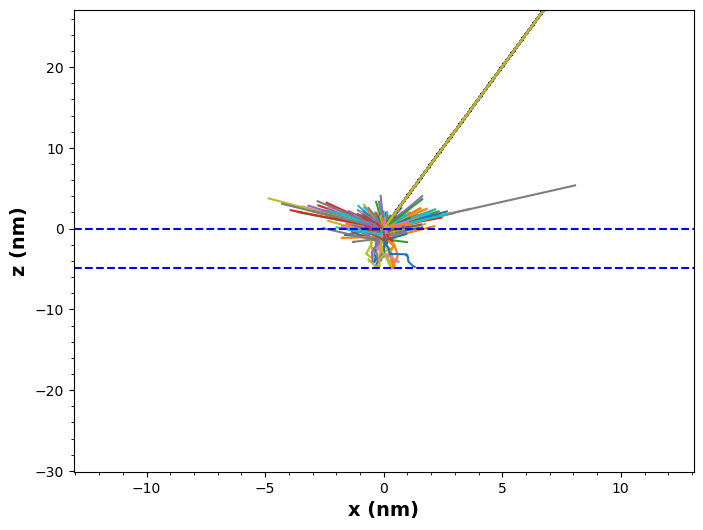

In [6]:
plt.figure(figsize=(8, 6))
max_x = float('-inf')                                        #Initialize a variable to store the maximum x value
max_z = float('-inf')                                        #Initialize a variable to store the maximum x value

for i in range(len(pos_coord_specific)):                     #Number of sample
    x_vals = []
    y_vals = []
    z_vals = []

    for j in range(len(pos_coord_specific[i])):              #Number of data per each sample
        x = pos_coord_specific[i][j][0]
        y = pos_coord_specific[i][j][1]
        z = pos_coord_specific[i][j][2]
        x_vals.append(-x)
        y_vals.append( y)
        z_vals.append(-z)
    
    max_x = max(max_x, max(np.abs(x_vals)))
    max_z = max(max_z, max(np.abs(z_vals)))
    plt.plot(x_vals, z_vals, linestyle='-')
    
plt.axhline(y=0,          color='b', linestyle='--', label="y = -5")
plt.axhline(y=-thickness, color='b', linestyle='--', label="y = -5")
plt.xlabel("x (nm)", weight='bold', fontsize=14)
plt.ylabel("z (nm)", weight='bold', fontsize=14)

plt.xlim(-max_x-5, max_x+5)
#plt.xlim(-5, 5)
plt.ylim(-max_z-1, max_z-2)
#plt.ylim(-10, 5)

plt.minorticks_on()
#plt.yticks(np.arange(int(-max_z-1), int(max_z-2), 0.5))
plt.savefig("Figures/Fig_EELS_backscattering_example.png", dpi=600, bbox_inches='tight')
plt.show()

In [7]:
print(len(pos_coord))                # number of samples
print(len(energy_losses))            # number of total collisions
print(len(secondaries))              # number of ionizations
print()
print(len(T_d_data_all))
print("{:.2f}".format(np.mean(T_d_data_all)*100) + " %")
print(str(len(EELS_second_energies)) + " (" + "{:.2f}".format(len(EELS_second_energies)*100/len(secondaries))+ "% escaped and detected)")
                                     # number of secondary electrons detected

100000
1029169
33388

33388
26.70 %
597 (1.79% escaped and detected)


In [8]:
colls = list()
for j in range(0, len(coll_data[0])):
    tmp = 0
    for i in range(0, len(coll_data)):
        tmp = tmp + coll_data[i][j]
    colls.append(tmp)
    
print("Type of scattering   : Inf, Trap, Exc, Ion, TNA-EAD, Elastic, DEA, DOSD, Exc-EAD, SurfaceReflect, Secondary")
print("coll_data            :", colls)

Type of scattering   : Inf, Trap, Exc, Ion, TNA-EAD, Elastic, DEA, DOSD, Exc-EAD, SurfaceReflect, Secondary
coll_data            : [114403, 0, 7568, 33388, 117, 790704, 18, 40956, 0, 21990, 597]


TOTAL                  : 100000
     Excitation           : 7568
     Ionization           : 33388
     TNA-DEA              : 18
     TNA-EAD              : 117
     Exc-EAD              : 0

[Theta=all direction]
   Direct reflected    : 21990 (22.0%)
   Backscattered       : 4122 (4.1%)
          (Eloss = 0)     : 2662
          (Eloss <= 7)    : 1014
          (Eloss >  7)    : 446
   Transmitted         : 72664 (72.7%)
   Terminated          : 1224 (1.22%)

   Secondary detected  : 597 (1.79%)

[Theta=Specific detection angle]
   Direct reflected    : 488 (0.49%)
   Backscattered       : 144
          (Eloss = 0)     : 88 (61.11%)
          (Eloss <= 7)    : 39
          (Eloss >  7)    : 17

Mean collisions in film:  11.06




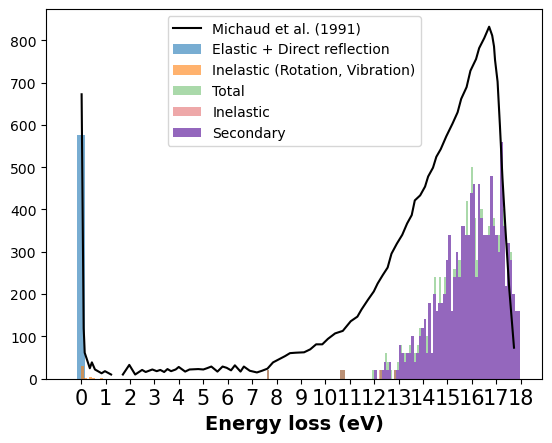

In [9]:
## 14.3, 19, and 100 eV cases

res         = EELS_data_all[-1][-1]                                    #res[0]=EELS_back_coll_all, res[1]=EELS_through_coll_all

#detection angle
filtered0   = [x for x in E_loss_EELS_back_specific_all]
filtered1   = [x for x in E_loss_EELS_back_specific_all if x == 0]                      #elastic 
filtered2   = [x for x in E_loss_EELS_back_specific_all if 0 < x <= 7]                  #vibrational
#filtered3   = [x for x in E_loss_EELS_back_specific_all if 7 < x <= energy-0.8]         #inelastic
filtered3   = [x for x in E_loss_EELS_back_specific_all if x > 7]         #inelastic
filtered31  = [x for x in E_loss_EELS_back_specific_exc_all]
filtered32  = [x for x in E_loss_EELS_back_specific_ion_all]

if energy_ini == 100:
    filtered3 = filtered31 + filtered32

ASW_reflect = [0] * int(colls[9] * 0.0222)                                              #2.22% of direct reflection at ASW surface detect (4/180)

#all direction
filtered4   = [x for x in E_loss_EELS_back_all if x == 0]                               #elastic
filtered5   = [x for x in E_loss_EELS_back_all if 0 < x <=7]                            #vibrational
filtered6   = [x for x in E_loss_EELS_back_all if x > 7]                  #inelastic

print("TOTAL                  : " + str(new_samples))
print("     Excitation           : " + str(colls[2]))
print("     Ionization           : " + str(colls[3]))
print("     TNA-DEA              : " + str(colls[6]))
print("     TNA-EAD              : " + str(colls[4]))
print("     Exc-EAD              : " + str(colls[8]))
print("")
print("[Theta=all direction]")
print("   Direct reflected    : " + str(colls[9]) + " (" + "{:.1f}".format(colls[9] / new_samples * 100) + "%)")
print("   Backscattered       : " + str(res[0])   + " (" + "{:.1f}".format(res[0]   / new_samples * 100) + "%)")            #EELS_through_coll
print("          (Eloss = 0)     : " + str(len(filtered4)))
print("          (Eloss <= 7)    : " + str(len(filtered5)))
print("          (Eloss >  7)    : " + str(len(filtered6)))
#print("          (Eloss <= E0-Eb): " + str(len(filtered6)))
#print("          (Eloss > E0-Eb) : " + str(len([x for x in E_loss_EELS_back_all if x > energy-0.8])))
print("   Transmitted         : " + str(res[1]) + " (" + "{:.1f}".format(res[1] / new_samples * 100) + "%)")            #EELS_through_coll
print("   Terminated          : " + str(new_samples-res[0]-res[1]-colls[9]) + " (" + "{:.2f}".format((new_samples-res[0]-res[1]-colls[9]) / new_samples * 100) + "%)")           #EELS_through_coll
print("")
print("   Secondary detected  : " + str(colls[10]) + " (" + "{:.2f}".format(colls[10] / colls[3] * 100) + "%)")
print("")
print("[Theta=Specific detection angle]")
print("   Direct reflected    : " + str(len(ASW_reflect)) + " (" + "{:.2f}".format(len(ASW_reflect) / new_samples * 100) + "%)")
print("   Backscattered       : " + str(len(filtered0)))
print("          (Eloss = 0)     : " + str(len(filtered1)) + " (" + "{:.2f}".format(len(filtered1) / len(filtered0) * 100)+ "%)")
print("          (Eloss <= 7)    : " + str(len(filtered2)))
print("          (Eloss >  7)    : " + str(len(filtered3)))
#print("          (Eloss <= E0-Eb): " + str(len(filtered3)))
#print("          (Eloss > E0-Eb) : " + str(len([x for x in E_loss_EELS_back_specific_all if x > energy-0.8])))
print("")
print("Mean collisions in film:  " + "{:.2f}".format(avg_col_num))
print("")
print("")

if new_samples == 5*10**6:
    sf=3300#1200
elif new_samples == 4*10**6:
    sf=1000
elif new_samples == 2*10**6:
    sf=550#1200
elif new_samples == 10**6:
    sf=900
elif new_samples == 5*10**5:
    sf=140
elif new_samples == 2*10**5:
    sf=100
elif new_samples == 10**5:
    sf=70
else:
    sf=5
    
bin_res = 0.1
"""
plt.figure(1)
if elist[0] == 14.3:
    plt.plot(EELS14_data[:11, 0], EELS14_data[:11, 1]*sf, '-', label='Michaud et al. (1991)')
    plt.plot(EELS14_data[11:, 0], EELS14_data[11:, 1]*sf, '-')#, label='Michaud et al. (1991)')
    plt.hist(filtered1 + ASW_reflect, bins=3,                              alpha=0.6, density=False, label='Elastic + Direct reflection')#color='tab:blue')
    plt.hist(filtered2, bins=int((max(filtered2)-min(filtered2))/bin_res), alpha=0.6, density=False, label='Inelastic (Rotation, Vibration)')#color='tab:blue')
    plt.xticks(np.arange(0, 15, 1), fontsize=15)
    plt.title(str(elist[0]) + " eV, " + "{:.0f}".format(thickness/0.176) + " layers, " + "Theta: 119-123deg, " + str(new_samples/1000000) + "M samples")
    psf = 20
elif elist[0] == 19:
    plt.plot(EELS19_data[:11, 0], EELS19_data[:11, 1]*sf, '-', label='Michaud et al. (1991)')
    plt.plot(EELS19_data[11:, 0], EELS19_data[11:, 1]*sf, '-')#, label='Michaud et al. (1991)')
    plt.hist(filtered1 + ASW_reflect, bins=3,                              alpha=0.6, density=False, label='Elastic + Direct reflection')#color='tab:blue')
    plt.hist(filtered2, bins=int((max(filtered2)-min(filtered2))/bin_res), alpha=0.6, density=False, label='Inelastic (Rotation, Vibration)')#color='tab:blue')
    plt.xticks(np.arange(0, 20, 1), fontsize=15)
    plt.title(str(elist[0]) + " eV, " + "{:.0f}".format(thickness/0.176) + " layers, " + "Theta: 119-123deg, " + str(new_samples/1000000) + "M samples")
    psf = 20
else:
    plt.plot(EELS100_data[:, 0], EELS100_data[:, 1]*sf, '-', label='Wilson et al. (2001)')
    plt.xticks(np.arange(0, 51, 5), fontsize=15)
    plt.title(str(elist[0]) + " eV, " + "{:.0f}".format(thickness/0.176) + " layers, " + "Theta: 135-139deg, " + str(new_samples/1000000) + "M samples")
    psf = 1

plt.hist(filtered3, bins=int((max(filtered3)-min(filtered3))/bin_res), alpha=0.6, density=False, label='Inelastic', \
         weights=psf * np.ones(len(filtered3)))#color='tab:blue')

"""
"""
kde     = stats.gaussian_kde(filtered3, bw_method=0.4)
x_vals  = np.linspace(int(min(filtered3)), int(max(filtered3)), 10*(int(max(filtered3)-min(filtered3))+1))
plt.plot(x_vals, kde(x_vals)*15000, color='red', label="KDE")
"""
"""
#plt.xlim(0, 50)
#plt.ylim(0, 1000)
plt.xlabel("Energy loss (eV)",                 fontsize = 14, weight='bold')
plt.ylabel("Scattered intensity (arb. units)", fontsize = 14, weight='bold', labelpad = -5)
plt.yticks(color='w')
plt.legend()
plt.savefig("Figures/Fig_EELS_" + str(energy) + "eV_multiple.png", dpi=600, bbox_inches='tight')
plt.show()
"""


plt.figure(2)
if elist[0] == 14.3:
    plt.plot(EELS14_data[:11, 0], EELS14_data[:11, 1]*sf, 'k-', label='Michaud et al. (1991)')
    plt.plot(EELS14_data[11:, 0], EELS14_data[11:, 1]*sf, 'k-')#, label='Michaud et al. (1991)')
    plt.hist(filtered1 + ASW_reflect, bins=3,                              alpha=0.6, density=False, label='Elastic + Direct reflection')     #color='tab:blue')
    plt.hist(filtered2, bins=int((max(filtered2)-min(filtered2))/bin_res), alpha=0.6, density=False, label='Inelastic (Rotation, Vibration)') #color='tab:blue')
    second14 = [energy-x for x in EELS_second_energies]
    second   = second14    
    plt.xticks(np.arange(0, 15, 1), fontsize=15)
    psf = 20
    #plt.xlim(0, 15)
    
elif elist[0] == 19:
    plt.plot(EELS19_data[:11, 0], EELS19_data[:11, 1] * sf, 'k-', label='Michaud et al. (1991)')
    plt.plot(EELS19_data[11:, 0], EELS19_data[11:, 1] * sf, 'k-')#, label='Michaud et al. (1991)')
    plt.hist(filtered1 + ASW_reflect, bins=3,                              alpha=0.6, density=False, label='Elastic + Direct reflection')     #color='tab:blue')
    plt.hist(filtered2, bins=int((max(filtered2)-min(filtered2))/bin_res), alpha=0.6, density=False, label='Inelastic (Rotation, Vibration)') #color='tab:blue')
    second19 = [energy-x for x in EELS_second_energies]
    second   = second19        
    plt.xticks(np.arange(0, 20, 1), fontsize=15)
    psf = 20
    #plt.xlim(0, 20)
else:
    plt.plot(EELS100_data[:, 0], EELS100_data[:, 1] * sf, 'k-', label='Wilson et al. (2001)')
    second100 = [energy-x for x in EELS_second_energies]
    second    = second100
    plt.xticks(np.arange(0, 101, 10), fontsize=15)
    psf = 1
    #plt.xlim(0, 20)


plt.hist(np.concatenate([filtered3, second]), bins=int((max(np.concatenate([filtered3, second]))-min(np.concatenate([filtered3, second])))/bin_res), \
                                                                       alpha=0.4, density=False, label='Total',     weights=psf * np.ones(len(np.concatenate([filtered3, second]))))
plt.hist(filtered3, bins=int((max(filtered3)-min(filtered3))/bin_res), alpha=0.4, density=False, label='Inelastic', weights=psf * np.ones(len(filtered3)))#color='tab:blue')
plt.hist(second,    bins=int((max(second)-min(second))      /bin_res), alpha=1,   density=False, label='Secondary', weights=psf * np.ones(len(second)))
"""
plt.hist(filtered31, bins=int((max(filtered31)-min(filtered31))/bin_res), alpha=0.6, density=False, label='Excitation', weights=np.ones(len(filtered31)) * 20)#color='tab:blue')
plt.hist(filtered32, bins=int((max(filtered32)-min(filtered32))/bin_res), alpha=0.6, density=False, label='Ionization', weights=np.ones(len(filtered32)) * 20)#color='tab:blue')
"""
plt.xlabel("Energy loss (eV)",                 fontsize = 14, weight='bold')
#plt.ylabel("Scattered intensity (arb. units)", fontsize = 14, weight='bold', labelpad = -5)
#plt.yticks(color='w')
plt.legend()
plt.savefig("Figures/Fig_EELS_" + str(energy) + "eV_multiple_electronic.png", dpi=600, bbox_inches='tight')
plt.show()

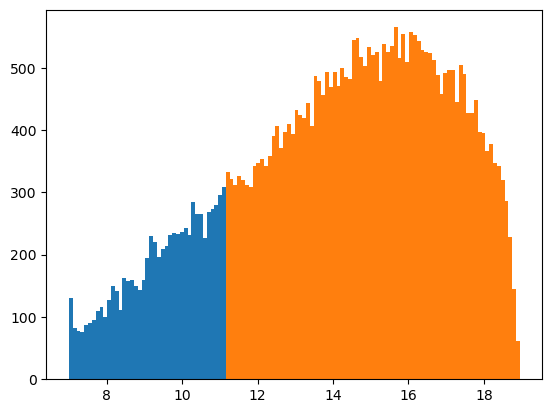

In [11]:
plt.hist(E_exc_loss_all, bins=int(10*(max(E_exc_loss_all)-min(E_exc_loss_all))))
plt.hist(E_ion_loss_all, bins=int(10*(max(E_ion_loss_all)-min(E_ion_loss_all))))
plt.show()

(array([ 3.,  5.,  4.,  4.,  3.,  7.,  6.,  8.,  4., 12.,  5.,  6.,  9.,
         9., 14., 11.,  8.,  9.,  4., 12.,  8., 11., 10., 14.,  5., 11.,
         8.,  8.,  8., 10.,  8.,  8., 12., 12.,  6.,  6., 14.,  7.,  9.,
        16.,  7.,  9., 12.,  7., 12.,  6., 11.,  7.,  9.,  5.,  3., 10.,
         4.,  9.,  2.,  6.,  5.,  7., 10.,  4.,  8.,  5.,  5.,  3.,  7.,
         4.,  4.,  3.,  6.,  6.,  1.,  1.,  5.,  5.,  1.,  2.,  2.,  3.,
         4.,  2.,  4.,  2.,  2.,  1.,  3.,  1.,  0.,  3.,  3.,  0.,  2.,
         1.,  2.,  2.,  0.,  0.,  4.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  2.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([1.03934199, 1.08945005, 1.1395581 , 1.18966616, 1.23977422,
        1.28988228, 1.33999034, 1.39009839, 1.44020645, 1.49031451,
        1.54042257, 1.59053062, 1.64063868, 1.69074674, 1.7408548 ,
        1.79096286, 1.84107091, 1.89117897, 1.94128703, 1.99139509,
        2.04150315, 2.0916112 , 2.14171926, 2.19182

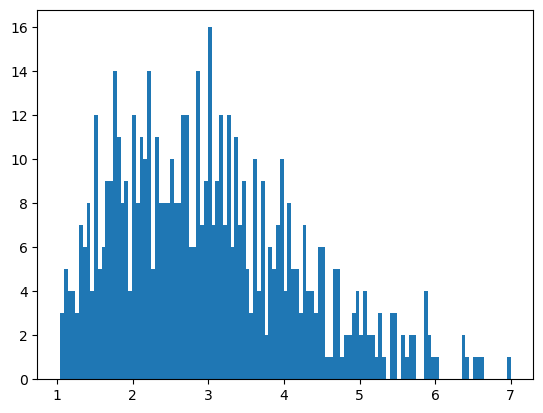

In [12]:
plt.hist(EELS_second_energies, bins=int(20*(max(EELS_second_energies)-min(EELS_second_energies))))

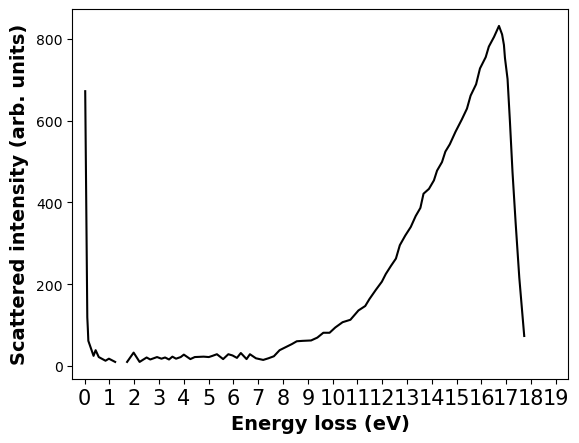

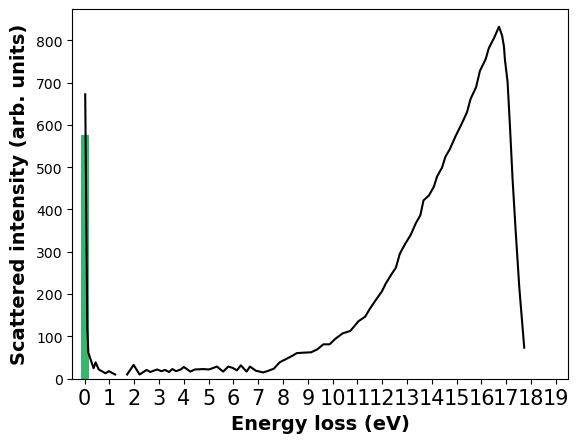

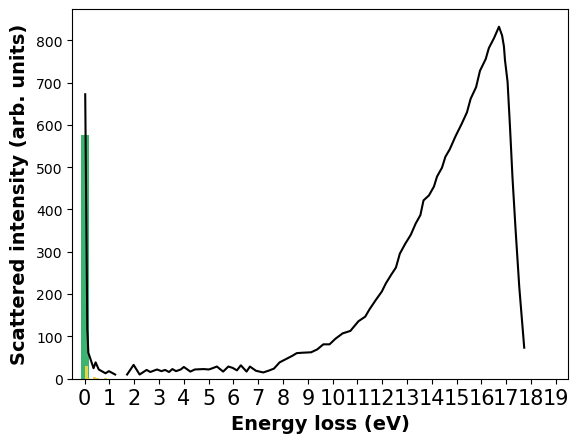

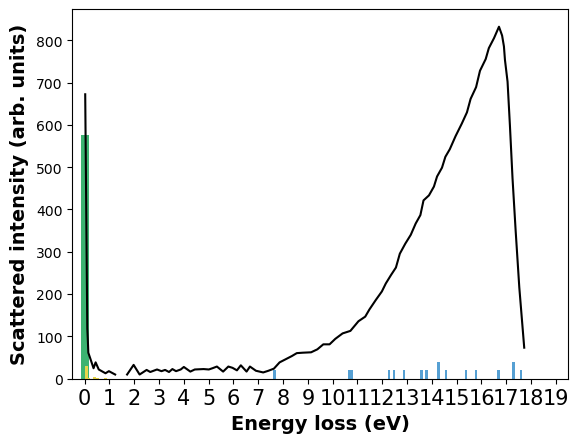

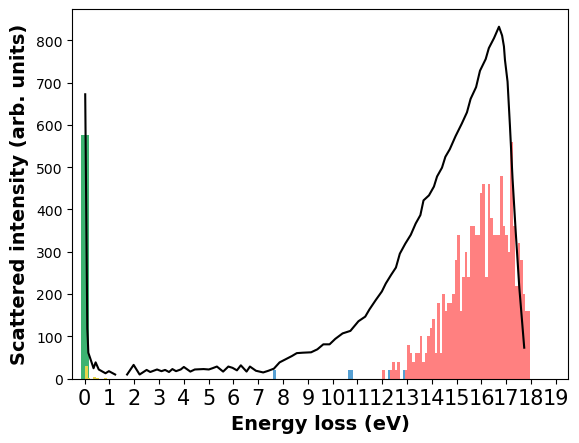

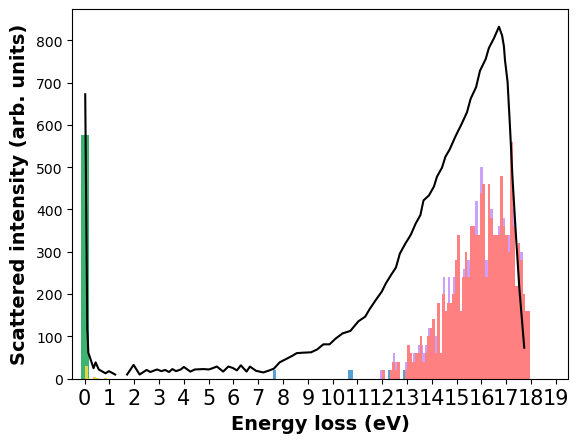

In [15]:
sf=70

plt.figure(1)
plt.plot(EELS19_data[:11, 0], EELS19_data[:11, 1]*sf, 'k-', label='Michaud et al. (1991)')
plt.plot(EELS19_data[11:, 0], EELS19_data[11:, 1]*sf, 'k-')#, label='Michaud et al. (1991)')
plt.xticks(np.arange(0, 20, 1), fontsize=15)
plt.xlabel("Energy loss (eV)",                 fontsize = 14, weight='bold')
plt.ylabel("Scattered intensity (arb. units)", fontsize = 14, weight='bold', labelpad = 5)
plt.xlim(-0.5, 19.5)
#plt.ylim(0, 41000)
#plt.yticks(color='w')
plt.savefig("Figures/Fig_EELS_" + str(energy) + "eV_animation_1.png", dpi=600, bbox_inches='tight')

plt.figure(2)
plt.plot(EELS19_data[:11, 0], EELS19_data[:11, 1]*sf, 'k-', label='Michaud et al. (1991)')
plt.plot(EELS19_data[11:, 0], EELS19_data[11:, 1]*sf, 'k-')#, label='Michaud et al. (1991)')
plt.hist(filtered1 + ASW_reflect, bins=3,                              alpha=1, density=False, label='Elastic + Direct reflection', \
         color='#3CB371') #green
plt.xticks(np.arange(0, 20, 1), fontsize=15)
plt.xlabel("Energy loss (eV)",                 fontsize = 14, weight='bold')
plt.ylabel("Scattered intensity (arb. units)", fontsize = 14, weight='bold', labelpad = 5)
plt.xlim(-0.5, 19.5)
#plt.ylim(0, 41000)
#plt.yticks(color='w')
plt.savefig("Figures/Fig_EELS_" + str(energy) + "eV_animation_2.png", dpi=600, bbox_inches='tight')

plt.figure(3)
plt.plot(EELS19_data[:11, 0], EELS19_data[:11, 1]*sf, 'k-', label='Michaud et al. (1991)')
plt.plot(EELS19_data[11:, 0], EELS19_data[11:, 1]*sf, 'k-')#, label='Michaud et al. (1991)')
plt.hist(filtered1 + ASW_reflect, bins=3,                              alpha=1, density=False, label='Elastic + Direct reflection', \
         color='#3CB371') #green
plt.hist(filtered2, bins=int((max(filtered2)-min(filtered2))/bin_res), alpha=1, density=False, label='Inelastic (Rotation, Vibration)', \
         color='#E6D54A') #yellow
plt.xticks(np.arange(0, 20, 1), fontsize=15)
plt.xlabel("Energy loss (eV)",                 fontsize = 14, weight='bold')
plt.ylabel("Scattered intensity (arb. units)", fontsize = 14, weight='bold', labelpad = 5)
plt.xlim(-0.5, 19.5)
#plt.ylim(0, 41000)
#plt.yticks(color='w')
plt.savefig("Figures/Fig_EELS_" + str(energy) + "eV_animation_3.png", dpi=600, bbox_inches='tight')

plt.figure(4)
psf = 20
plt.plot(EELS19_data[:11, 0], EELS19_data[:11, 1]*sf, 'k-', label='Michaud et al. (1991)')
plt.plot(EELS19_data[11:, 0], EELS19_data[11:, 1]*sf, 'k-')#, label='Michaud et al. (1991)')
plt.hist(filtered1 + ASW_reflect, bins=3,                              alpha=1, density=False, label='Elastic + Direct reflection', \
         color='#3CB371') #green
plt.hist(filtered2, bins=int((max(filtered2)-min(filtered2))/bin_res), alpha=1, density=False, label='Inelastic (Rotation, Vibration)', \
         color='#E6D54A') #yellow
plt.hist(filtered3, bins=int((max(filtered3)-min(filtered3))/bin_res), alpha=1, density=False, label='Inelastic', weights=psf * np.ones(len(filtered3)), \
         color='#56A0D3') #blue
plt.xticks(np.arange(0, 20, 1), fontsize=15)
plt.xlabel("Energy loss (eV)",                 fontsize = 14, weight='bold')
plt.ylabel("Scattered intensity (arb. units)", fontsize = 14, weight='bold', labelpad = 5)
plt.xlim(-0.5, 19.5)
#plt.ylim(0, 41000)
#plt.yticks(color='w')
plt.savefig("Figures/Fig_EELS_" + str(energy) + "eV_animation_4.png", dpi=600, bbox_inches='tight')

plt.figure(5)
psf = 20
plt.plot(EELS19_data[:11, 0], EELS19_data[:11, 1]*sf, 'k-', label='Michaud et al. (1991)')
plt.plot(EELS19_data[11:, 0], EELS19_data[11:, 1]*sf, 'k-')#, label='Michaud et al. (1991)')
plt.hist(filtered1 + ASW_reflect, bins=3,                              alpha=1, density=False, label='Elastic + Direct reflection', \
         color='#3CB371') #green
plt.hist(filtered2, bins=int((max(filtered2)-min(filtered2))/bin_res), alpha=1, density=False, label='Inelastic (Rotation, Vibration)', \
         color='#E6D54A') #yellow
plt.hist(filtered3, bins=int((max(filtered3)-min(filtered3))/bin_res), alpha=1, density=False, label='Inelastic', weights=psf * np.ones(len(filtered3)), \
         color='#56A0D3') #blue
plt.hist(second,    bins=int((max(second)-min(second)) /bin_res), alpha=1, density=False, label='Secondary', weights=psf * np.ones(len(second)), \
         color='#FF8080') #red
plt.xticks(np.arange(0, 20, 1), fontsize=15)
plt.xlabel("Energy loss (eV)",                 fontsize = 14, weight='bold')
plt.ylabel("Scattered intensity (arb. units)", fontsize = 14, weight='bold', labelpad = 5)
plt.xlim(-0.5, 19.5)
#plt.ylim(0, 41000)
#plt.yticks(color='w')
plt.savefig("Figures/Fig_EELS_" + str(energy) + "eV_animation_5.png", dpi=600, bbox_inches='tight')

plt.figure(6)
psf = 20
second19 = [energy-x for x in EELS_second_energies]
second   = second19
plt.plot(EELS19_data[:11, 0], EELS19_data[:11, 1]*sf, 'k-', label='Michaud et al. (1991)')
plt.plot(EELS19_data[11:, 0], EELS19_data[11:, 1]*sf, 'k-')#, label='Michaud et al. (1991)')
plt.hist(filtered1 + ASW_reflect, bins=3,                              alpha=1, density=False, label='Elastic + Direct suface reflection', \
         color='#3CB371') #green
plt.hist(filtered2, bins=int((max(filtered2)-min(filtered2))/bin_res), alpha=1, density=False, label='Inelastic (Vibrational)', \
         color='#E6D54A') #yellow
plt.hist(np.concatenate([filtered3, second]), bins=int((max(np.concatenate([filtered3, second]))-min(np.concatenate([filtered3, second])))/bin_res), \
         alpha=1, density=False, label='Total: Inelastic (Electronic) + Secondary',     weights=psf * np.ones(len(np.concatenate([filtered3, second]))), \
         color='#CBA0FF') #purple
plt.hist(filtered3, bins=int((max(filtered3)-min(filtered3))/bin_res), alpha=1, density=False, label='Inelastic (Electronic)', weights=psf * np.ones(len(filtered3)), \
         color='#56A0D3') #blue
plt.hist(second,    bins=int((max(second)-min(second)) /bin_res), alpha=1, density=False, label='Secondary electrons', weights=psf * np.ones(len(second)), \
         color='#FF8080') #red
plt.xticks(np.arange(0, 20, 1), fontsize=15)
plt.xlabel("Energy loss (eV)",                 fontsize = 14, weight='bold')
plt.ylabel("Scattered intensity (arb. units)", fontsize = 14, weight='bold', labelpad = 5)
plt.xlim(-0.5, 19.5)
#plt.ylim(0, 41000)
#plt.yticks(color='w')
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig("Figures/Fig_EELS_" + str(energy) + "eV_animation_6.png", dpi=600, bbox_inches='tight')

plt.show()

In [11]:
"""
sf=1400

plt.figure(1)
plt.plot(EELS14_data[:11, 0], EELS14_data[:11, 1]*sf, 'k-', label='Michaud et al. (1991)')
plt.plot(EELS14_data[11:, 0], EELS14_data[11:, 1]*sf, 'k-')#, label='Michaud et al. (1991)')
plt.xticks(np.arange(0, 15, 1), fontsize=15)
plt.xlabel("Energy loss (eV)",                 fontsize = 14, weight='bold')
plt.ylabel("Scattered intensity (arb. units)", fontsize = 14, weight='bold', labelpad = -5)
plt.xlim(-0.5, 14.5)
plt.ylim(0, 14000)
plt.yticks(color='w')
plt.savefig("Figures/Fig_EELS_" + str(energy) + "eV_animation_1.png", dpi=600, bbox_inches='tight')

plt.figure(2)
plt.plot(EELS14_data[:11, 0], EELS14_data[:11, 1]*sf, 'k-', label='Michaud et al. (1991)')
plt.plot(EELS14_data[11:, 0], EELS14_data[11:, 1]*sf, 'k-')#, label='Michaud et al. (1991)')
plt.hist(filtered1 + ASW_reflect, bins=3,                              alpha=1, density=False, label='Elastic + Direct reflection', \
         color='#3CB371') #green
plt.xticks(np.arange(0, 15, 1), fontsize=15)
plt.xlabel("Energy loss (eV)",                 fontsize = 14, weight='bold')
plt.ylabel("Scattered intensity (arb. units)", fontsize = 14, weight='bold', labelpad = -5)
plt.xlim(-0.5, 14.5)
plt.ylim(0, 14000)
plt.yticks(color='w')
plt.savefig("Figures/Fig_EELS_" + str(energy) + "eV_animation_2.png", dpi=600, bbox_inches='tight')

plt.figure(3)
plt.plot(EELS14_data[:11, 0], EELS14_data[:11, 1]*sf, 'k-', label='Michaud et al. (1991)')
plt.plot(EELS14_data[11:, 0], EELS14_data[11:, 1]*sf, 'k-')#, label='Michaud et al. (1991)')
plt.hist(filtered1 + ASW_reflect, bins=3,                              alpha=1, density=False, label='Elastic + Direct reflection', \
         color='#3CB371') #green
plt.hist(filtered2, bins=int((max(filtered2)-min(filtered2))/bin_res), alpha=1, density=False, label='Inelastic (Rotation, Vibration)', \
         color='#E6D54A') #yellow
plt.xticks(np.arange(0, 15, 1), fontsize=15)
plt.xlabel("Energy loss (eV)",                 fontsize = 14, weight='bold')
plt.ylabel("Scattered intensity (arb. units)", fontsize = 14, weight='bold', labelpad = -5)
plt.xlim(-0.5, 14.5)
plt.ylim(0, 14000)
plt.yticks(color='w')
plt.savefig("Figures/Fig_EELS_" + str(energy) + "eV_animation_3.png", dpi=600, bbox_inches='tight')

plt.figure(4)
psf = 20
plt.plot(EELS14_data[:11, 0], EELS14_data[:11, 1]*sf, 'k-', label='Michaud et al. (1991)')
plt.plot(EELS14_data[11:, 0], EELS14_data[11:, 1]*sf, 'k-')#, label='Michaud et al. (1991)')
plt.hist(filtered1 + ASW_reflect, bins=3,                              alpha=1, density=False, label='Elastic + Direct reflection', \
         color='#3CB371') #green
plt.hist(filtered2, bins=int((max(filtered2)-min(filtered2))/bin_res), alpha=1, density=False, label='Inelastic (Rotation, Vibration)', \
         color='#E6D54A') #yellow
plt.hist(filtered3, bins=int((max(filtered3)-min(filtered3))/bin_res), alpha=1, density=False, label='Inelastic', weights=psf * np.ones(len(filtered3)), \
         color='#56A0D3') #blue
plt.xticks(np.arange(0, 15, 1), fontsize=15)
plt.xlabel("Energy loss (eV)",                 fontsize = 14, weight='bold')
plt.ylabel("Scattered intensity (arb. units)", fontsize = 14, weight='bold', labelpad = -5)
plt.xlim(-0.5, 14.5)
plt.ylim(0, 14000)
plt.yticks(color='w')
plt.savefig("Figures/Fig_EELS_" + str(energy) + "eV_animation_4.png", dpi=600, bbox_inches='tight')

plt.figure(5)
psf = 20
plt.plot(EELS14_data[:11, 0], EELS14_data[:11, 1]*sf, 'k-', label='Michaud et al. (1991)')
plt.plot(EELS14_data[11:, 0], EELS14_data[11:, 1]*sf, 'k-')#, label='Michaud et al. (1991)')
plt.hist(filtered1 + ASW_reflect, bins=3,                              alpha=1, density=False, label='Elastic + Direct reflection', \
         color='#3CB371') #green
plt.hist(filtered2, bins=int((max(filtered2)-min(filtered2))/bin_res), alpha=1, density=False, label='Inelastic (Rotation, Vibration)', \
         color='#E6D54A') #yellow
plt.hist(filtered3, bins=int((max(filtered3)-min(filtered3))/bin_res), alpha=1, density=False, label='Inelastic', weights=psf * np.ones(len(filtered3)), \
         color='#56A0D3') #blue
plt.hist(second,    bins=int((max(second)-min(second)) /bin_res), alpha=1, density=False, label='Secondary', weights=psf * np.ones(len(second)), \
         color='#FF8080') #red
plt.xticks(np.arange(0, 15, 1), fontsize=15)
plt.xlabel("Energy loss (eV)",                 fontsize = 14, weight='bold')
plt.ylabel("Scattered intensity (arb. units)", fontsize = 14, weight='bold', labelpad = -5)
plt.xlim(-0.5, 14.5)
plt.ylim(0, 14000)
plt.yticks(color='w')
plt.savefig("Figures/Fig_EELS_" + str(energy) + "eV_animation_5.png", dpi=600, bbox_inches='tight')

plt.figure(6)
psf = 20
second14 = [energy-x for x in EELS_second_energies]
second   = second14
plt.plot(EELS14_data[:11, 0], EELS14_data[:11, 1]*sf, 'k-', label='Michaud et al. (1991)')
plt.plot(EELS14_data[11:, 0], EELS14_data[11:, 1]*sf, 'k-')#, label='Michaud et al. (1991)')
plt.hist(filtered1 + ASW_reflect, bins=3,                              alpha=1, density=False, label='Elastic + Direct reflection', \
         color='#3CB371') #green
plt.hist(filtered2, bins=int((max(filtered2)-min(filtered2))/bin_res), alpha=1, density=False, label='Inelastic (Rotation, Vibration)', \
         color='#E6D54A') #yellow
plt.hist(np.concatenate([filtered3, second]), bins=int((max(np.concatenate([filtered3, second]))-min(np.concatenate([filtered3, second])))/bin_res), \
         alpha=1, density=False, label='Total',     weights=psf * np.ones(len(np.concatenate([filtered3, second]))), \
         color='#CBA0FF') #purple
plt.hist(filtered3, bins=int((max(filtered3)-min(filtered3))/bin_res), alpha=1, density=False, label='Inelastic', weights=psf * np.ones(len(filtered3)), \
         color='#56A0D3') #blue
plt.hist(second,    bins=int((max(second)-min(second)) /bin_res), alpha=1, density=False, label='Secondary', weights=psf * np.ones(len(second)), \
         color='#FF8080') #red
plt.xticks(np.arange(0, 15, 1), fontsize=15)
plt.xlabel("Energy loss (eV)",                 fontsize = 14, weight='bold')
plt.ylabel("Scattered intensity (arb. units)", fontsize = 14, weight='bold', labelpad = -5)
plt.xlim(-0.5, 14.5)
plt.ylim(0, 14000)
plt.yticks(color='w')
plt.savefig("Figures/Fig_EELS_" + str(energy) + "eV_animation_6.png", dpi=600, bbox_inches='tight')

plt.show()
"""

'\nsf=1400\n\nplt.figure(1)\nplt.plot(EELS14_data[:11, 0], EELS14_data[:11, 1]*sf, \'k-\', label=\'Michaud et al. (1991)\')\nplt.plot(EELS14_data[11:, 0], EELS14_data[11:, 1]*sf, \'k-\')#, label=\'Michaud et al. (1991)\')\nplt.xticks(np.arange(0, 15, 1), fontsize=15)\nplt.xlabel("Energy loss (eV)",                 fontsize = 14, weight=\'bold\')\nplt.ylabel("Scattered intensity (arb. units)", fontsize = 14, weight=\'bold\', labelpad = -5)\nplt.xlim(-0.5, 14.5)\nplt.ylim(0, 14000)\nplt.yticks(color=\'w\')\nplt.savefig("Figures/Fig_EELS_" + str(energy) + "eV_animation_1.png", dpi=600, bbox_inches=\'tight\')\n\nplt.figure(2)\nplt.plot(EELS14_data[:11, 0], EELS14_data[:11, 1]*sf, \'k-\', label=\'Michaud et al. (1991)\')\nplt.plot(EELS14_data[11:, 0], EELS14_data[11:, 1]*sf, \'k-\')#, label=\'Michaud et al. (1991)\')\nplt.hist(filtered1 + ASW_reflect, bins=3,                              alpha=1, density=False, label=\'Elastic + Direct reflection\',          color=\'#3CB371\') #green\nplt.x

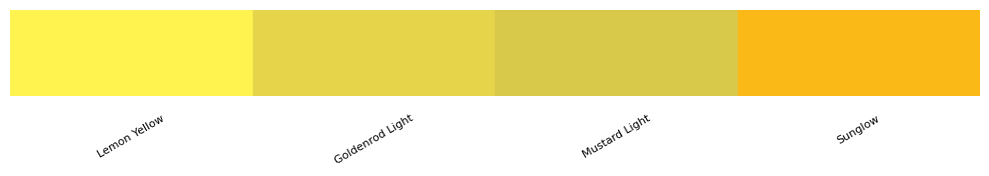

In [75]:
import matplotlib.pyplot as plt

blues = {
    "Lemon Yellow": "#FFF44F",
    "Goldenrod Light": "#E6D54A",  # 추천
    "Mustard Light": "#D9C94A",
    "Sunglow": "#FBB917"
}

fig, ax = plt.subplots(figsize=(10, 2))
for i, (name, hex_code) in enumerate(blues.items()):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=hex_code))
    ax.text(i + 0.5, -0.2, name, ha='center', va='top', fontsize=8, rotation=30)

ax.set_xlim(0, len(blues))
ax.set_ylim(0, 1)
ax.axis('off')
plt.tight_layout()
plt.show()

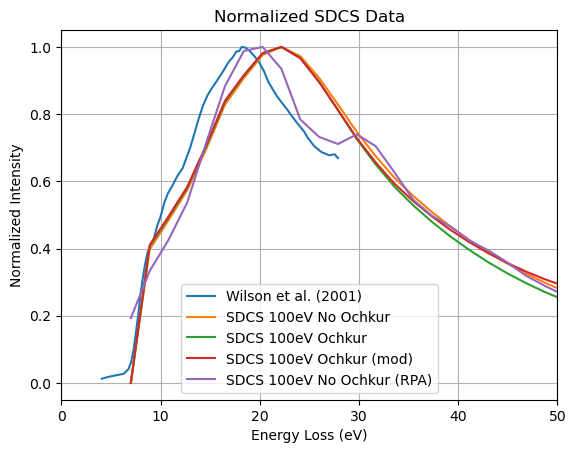

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Normalize the first dataset
x1 = EELS100_data[:, 0]
y1 = EELS100_data[:, 1] * sf
y1_norm = y1 / np.max(y1)
plt.plot(x1, y1_norm, '-', label='Wilson et al. (2001)')
plt.xlim(0,50)
# Load and normalize the second dataset

data2 = np.loadtxt("ELF/SDCS_100.0eV_NoOchkur.csv", delimiter=",")
x2 = data2[:, 0]
y2 = data2[:, 1]
y2_norm = y2 / np.max(y2)
plt.plot(x2, y2_norm, '-', label='SDCS 100eV No Ochkur')
plt.xlim(0,50)

data3 = np.loadtxt("ELF/SDCS_100.0eV_Ochkur.csv", delimiter=",")
x3 = data3[:, 0]
y3 = data3[:, 1]
y3_norm = y3 / np.max(y3)
plt.plot(x3, y3_norm, '-', label='SDCS 100eV Ochkur')
plt.xlim(0,50)

data4 = np.loadtxt("ELF/SDCS_100.0eV_Ochkur_mod.csv", delimiter=",")
x4 = data4[:, 0]
y4 = data4[:, 1]
y4_norm = y4 / np.max(y4)
plt.plot(x4, y4_norm, '-', label='SDCS 100eV Ochkur (mod)')
plt.xlim(0,50)

data5 = np.loadtxt("ELF/SDCS_100.0eV_NoOchkur_RPA_New.csv", delimiter=",")
x5 = data5[:, 0]
y5 = data5[:, 1]
y5_norm = y5 / np.max(y5)
plt.plot(x5, y5_norm, '-', label='SDCS 100eV No Ochkur (RPA)')
plt.xlim(0,50)

# Add plot formatting
plt.xlabel("Energy Loss (eV)")
plt.ylabel("Normalized Intensity")
plt.legend()
plt.title("Normalized SDCS Data")
plt.grid(True)
plt.show()

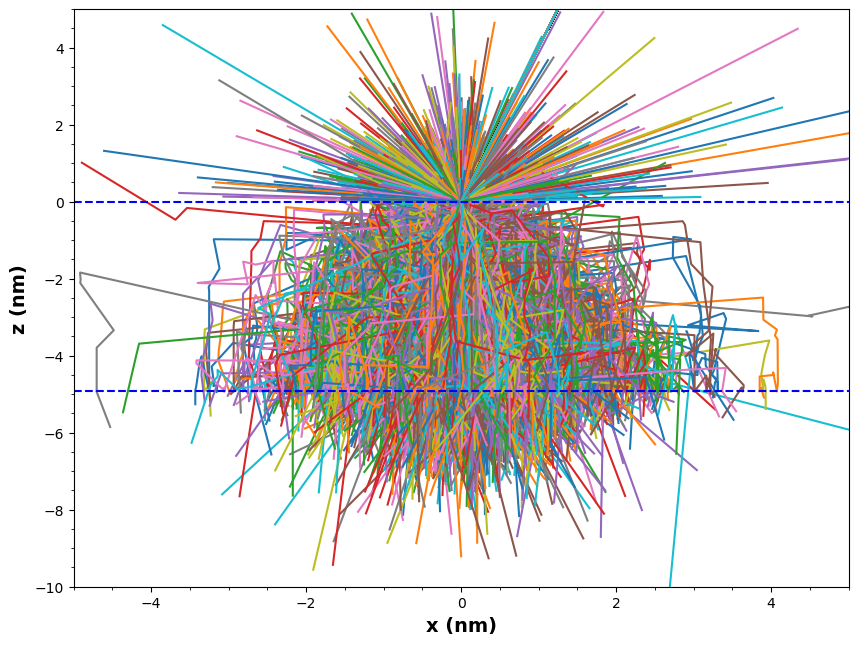

In [10]:
plt.figure(figsize=(10, 7.5))
max_x = float('-inf')  # Initialize a variable to store the maximum x value
max_z = float('-inf')  # Initialize a variable to store the maximum x value

for i in range(len(pos_coord)):                     #Number of sample
    x_vals = []
    y_vals = []
    z_vals = []

    for j in range(len(pos_coord[i])):              #Number of data per each sample
        x = pos_coord[i][j][0]
        y = pos_coord[i][j][1]
        z = pos_coord[i][j][2]
        x_vals.append(-x)
        y_vals.append( y)
        z_vals.append(-z)
    
    max_x = max(max_x, max(np.abs(x_vals)))
    max_z = max(max_z, max(np.abs(z_vals)))
    plt.plot(x_vals, z_vals, linestyle='-')
    
plt.axhline(y=0,          color='b', linestyle='--', label="y = -5")
plt.axhline(y=-thickness, color='b', linestyle='--', label="y = -5")
plt.xlabel("x (nm)", weight='bold', fontsize=14)
plt.ylabel("z (nm)", weight='bold', fontsize=14)
#plt.xlim(-max_x-5, max_x+5)
plt.xlim(-5, 5)
#plt.ylim(-max_z-1, max_z-2)
plt.ylim(-10, 5)
plt.minorticks_on()
#plt.yticks(np.arange(int(-max_z-1), int(max_z-2), 0.5))
plt.savefig("Figures/Fig_EELS_multiple.png", dpi=600, bbox_inches='tight')    
plt.show()

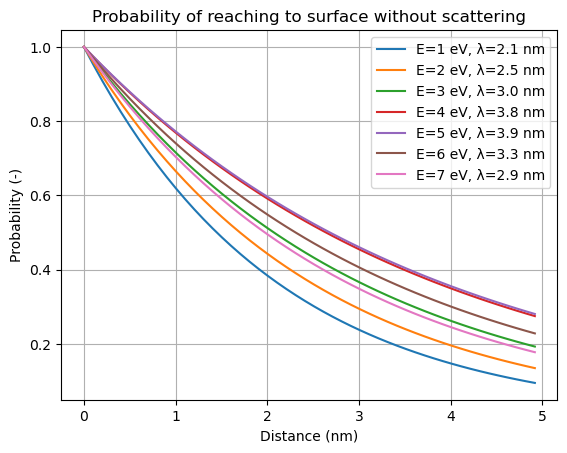

In [13]:
aa = np.linspace(0, 4.92).tolist()                    #distance to the surface
ee = [1, 2, 3, 4, 5, 6, 7]
mm = 1 / total_int(ee) / 3.125e22 * 1e16 * 1e7        #MFP

for j in range(len(ee)):
    P_values = [np.exp(-a / mm[j]) for a in aa]       #Compute P for all aa
    plt.plot(aa, P_values, label=f'E={ee[j]} eV, λ={mm[j]:.1f} nm')

plt.xlabel('Distance (nm)')
plt.ylabel('Probability (-)')
plt.title('Probability of reaching to surface without scattering')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
%%time
#Reproduce Elastic Reflectivity (Figs 1-2 of Michaud, 1987)


#################################################################
#################################################################
#################################################################

#WHILE LOOP IN THE FUNCTION MUST BE MODIFIED BEOFRE RUN THIS CELL

#################################################################
#################################################################
#################################################################

from MC_Hoon                   import *
import MC_Hoon
importlib.reload(MC_Hoon)
from MC_Hoon                   import *


new_samples   = 10**6             #(10**4: 5 min)

#elist         = [8, 9, 10, 11, 12, 13, 14, 15, 18, 20, 25, 30]
elist         = [25]
layers        = [3, 9, 12, 13, 16, 18, 30, 40]



thicknesses   = [x*1.76*0.1 for x in layers]                    #1.76 Angstrom (Michaud, 1987), 28 layers (Michaud, 1991)

esi_all       = np.zeros((len(thicknesses), len(elist)))
esi_specific  = np.zeros((len(thicknesses), len(elist)))
EELS_data_all = np.zeros((len(thicknesses), len(elist)), dtype=object)

for j in range(len(thicknesses)):
    thickness = thicknesses[j]
    #water_mass_density   = densitys[j]
    #water_number_density = water_mass_density / 18.01528 * 6.022e23 #per cm^3 (=per 1e21 nm^3)
    water_number_density = 3.125e22               #ASW

    energy_shift         = 0
    n_points             = len(elist)
    #points               = np.linspace(1, 100, n_points)
        
    Q_total                           = []
    cosine_total                      = []
    E_ion_total                       = []
    E_ion_loss_total                  = []
    E_inel_loss_total                 = []
    E_exc_loss_total                  = []
    E_loss_EELS_back_total            = []
    E_loss_EELS_back_specific_total   = []    
  
    for en_ind in range(n_points):
        energy                        = elist[en_ind]                    #20-1000eV
        energy_ini                    = energy
        
        pos_coord           = []
        #EELS_data           = []
        avg_col             = []
        #"""
        Q_all                         = []
        cosine_all                    = []
        E_ion_all                     = []
        E_ion_loss_all                = []
        E_inel_loss_all               = []
        E_exc_loss_all                = []
        E_loss_EELS_back_all          = []
        E_loss_EELS_back_specific_all = []
        #"""
        EELS_back_coll_all    = 0
        EELS_through_coll_all = 0

        energy_losses = []
        secondaries   = []
        
        for i in range(new_samples):
            (pos, depth, tot_distance, dist_travel, tot_t_elapsed, t_travel, energy_evol, inelastic_coll, trap_coll, excitation_coll,    \
             ionization_coll, cap_coll, DEA_coll, TNA_EAD_coll, elastic_coll, ion_init, ion_loss, count_all, count_cap, therm_num,       \
             ifcaptured, energy_incident, energy_loss, secondary, DOSD_coll, excitation_EAD_coll, meanDOSD, eloss_inelastic_per_sample,  \
             Q_data, cosine_data, E_ion_data, E_ion_loss_data, E_inel_loss_data, E_exc_loss_data, e_aq_Gval_Ion, e_aq_Gval_Exc_EAD,      \
             e_aq_Gval_TNA_EAD, excitation_EAD, energy_second, t_ionization, t_excitation, t_TNA_EAD, TNA_EAD, MT_data, pos_evol,\
             EELS_back_coll, EELS_through_coll, E_loss_EELS_back, E_loss_EELS_back_specific) \
            = run_MC(energy, t_max, water_number_density, aniso_fact, capture_int, inelastic_int, exc_el_int, exc_sp_int, Photo_eff_Mint, \
                     Photo_eff_Tint, total_int, inel_vec, losses, gammas, ion_frac_int, energy_shift, e_cutoff, res, res1, res2, res3,    \
                     dosd_int, extra_int1, nist_int, ELOSS_int, DOS_int, EXC_loss_int, others_int, thickness, energy_ini, elastic_ADCS_int)

            pos_coord.append(pos_evol)
            
            EELS_back_coll_all    += EELS_back_coll
            EELS_through_coll_all += EELS_through_coll
            energy_losses         += energy_loss
            secondaries           += energy_second
            
            avg_col.append(len(pos_evol)-2)
            #"""
            Q_all                         += Q_data
            cosine_all                    += cosine_data
            E_ion_all                     += E_ion_data
            E_ion_loss_all                += E_ion_loss_data
            E_inel_loss_all               += E_inel_loss_data
            E_exc_loss_all                += E_exc_loss_data
            E_loss_EELS_back_all          += E_loss_EELS_back
            E_loss_EELS_back_specific_all += E_loss_EELS_back_specific
            #"""
        avg_col_num          = np.mean(avg_col)     
        
        EELS_data_all[j, en_ind] = [EELS_back_coll_all, EELS_through_coll_all]
        esi_all[j, en_ind]       = len([x for x in E_loss_EELS_back_all          if x == 0]) / new_samples * 100
        esi_specific[j, en_ind]  = len([x for x in E_loss_EELS_back_specific_all if x == 0]) / len([x for x in E_loss_EELS_back_specific_all]) * 100




    
    filtered0 = [x for x in E_loss_EELS_back_specific_all]
    filtered1 = [x for x in E_loss_EELS_back_specific_all if x == 0]                      #elastic
    #filtered4 = [x for x in E_loss_EELS_back_all]                                         
    #filtered5 = [x for x in E_loss_EELS_back_all if x == 0]                               #elastic

    #print("Thickness: " + str(thickness))
    #print("Backscattered       : " + str(len(filtered0)))
    #print("    (Eloss = 0)     : " + str(len(filtered1)) + " (Elastic reflectivity (119-123deg): " + "{:.2f}".format(len(filtered1) / len(filtered0) * 100)+ "%)")
    #print("Backscattered       : " + str(len(filtered4)))
    #print("    (Eloss = 0)     : " + str(len(filtered5)) + " (Elastic reflectivity: " + "{:.2f}".format(len(filtered5) / len(filtered4) * 100)+ "%)")


TypeError: run_MC() missing 1 required positional argument: 'Pt_reflect_int'

In [15]:
#EELS_data_all                           #Number of layers * number of energies
esi_specific

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [16]:
# For example, print & plot results from the last iteration
res = EELS_data_all[-1][-1]

#119-123 degree
filtered0 = [x for x in E_loss_EELS_back_specific_all]
filtered1 = [x for x in E_loss_EELS_back_specific_all if x == 0]                      #elastic
filtered2 = [x for x in E_loss_EELS_back_specific_all if x <=7 and x > 0]             #vibrational
filtered3 = [x for x in E_loss_EELS_back_specific_all if x > 7 and x <= energy-1]     #electronic

#all direction
filtered4 = [x for x in E_loss_EELS_back_all if x == 0]                               #elastic
filtered5 = [x for x in E_loss_EELS_back_all if x <=7 and x > 0]                      #vibrational
filtered6 = [x for x in E_loss_EELS_back_all if x > 7 and x <= energy-1]              #electronic

print("   Backscattered       : " + str(len(filtered0)))
print("          (Eloss = 0)     : " + str(len(filtered1)) + " (Elastic reflectivity: " + "{:.2f}".format(len(filtered1) / len(filtered0) * 100)+ "%)")



"""
print("TOTAL                  : " + str(new_samples))
print("")
print("")
print("[Theta=all direction]")
print("   Backscattered       : " + str(res[0]) + " (" + "{:.1f}".format(res[0] / new_samples * 100) + "%)")   #EELS_back_coll
print("          (Eloss = 0)     : " + str(len(filtered4)))# + " (Elastic reflectivity: " + "{:.2f}".format(len(filtered4) / new_samples * 100)+ "%)")
print("          (Eloss <= 7)    : " + str(len(filtered5)))
print("          (Eloss <= E0-1) : " + str(len(filtered6)))
print("          (Eloss > E0-1)  : " + str(len([x for x in E_loss_EELS_back_all if x > energy-1])))
print("   Reached to Pt       : " + str(res[1]) + " (" + "{:.1f}".format(res[1] / new_samples * 100) + "%)")            #EELS_through_coll
print("   Track terminated    : " + str(new_samples-res[0]-res[1]) + " (" + "{:.2f}".format((new_samples-res[0]-res[1]) / new_samples * 100) + "%)")           #EELS_through_coll
print("")
print("")
print("[Theta=119-123 deg]")
print("   Backscattered       : " + str(len(filtered0)))
print("          (Eloss = 0)     : " + str(len(filtered1)))# + " (Elastic reflectivity: " + "{:.2f}".format(len(filtered1) / new_samples * 100)+ "%)")
print("          (Eloss <= 7)    : " + str(len(filtered2)))
print("          (Eloss <= E0-1) : " + str(len(filtered3)))
print("          (Eloss > E0-1)  : " + str(len([x for x in E_loss_EELS_back_specific_all if x > energy-1])))
print("")
print("")
print("Mean collisions in film:  " + "{:.2f}".format(avg_col_num))
print("")
print("")


#plt.figure(figsize=(10, 7.5))
plt.figure()
max_x = float('-inf')  # Initialize a variable to store the maximum x value
max_z = float('-inf')  # Initialize a variable to store the maximum x value

for i in range(len(pos_coord)):                     #Number of sample
    x_vals = []
    y_vals = []
    z_vals = []

    for j in range(len(pos_coord[i])):              #Number of data per each sample
        x = pos_coord[i][j][0]
        y = pos_coord[i][j][1]
        z = pos_coord[i][j][2]
        x_vals.append(-x)
        y_vals.append( y)
        z_vals.append(-z)
    
    max_x = max(max_x, max(np.abs(x_vals)))
    max_z = max(max_z, max(np.abs(z_vals)))
    plt.title(str(elist[-1]) + " eV, " + str(layers[-1]) + " layers (" + f"{thicknesses[-1]:.2f}" + " nm)")
    plt.plot(x_vals, z_vals, linestyle='-')
    
plt.axhline(y=0,          color='b', linestyle='--', label="y = -5")
plt.axhline(y=-thickness, color='b', linestyle='--', label="y = -5")
plt.xlabel("x (nm)", weight='bold', fontsize=14)
plt.ylabel("z (nm)", weight='bold', fontsize=14)
plt.xlim(-max_x-5, max_x+5)
plt.ylim(-max_z-1, max_z-2)
#plt.xlim(-20, 20)
#plt.ylim(-15, 13)
plt.ylim(-9, 6)
plt.minorticks_on()
#plt.yticks(np.arange(int(-max_z-1), int(max_z-2), 0.5))
#plt.savefig("Figures/Fig_EELS_multiple.png", dpi=600, bbox_inches='tight')
#plt.legend()
plt.show()
"""

   Backscattered       : 0


ZeroDivisionError: division by zero

In [ ]:
print(esi_all)
print(esi_specific)
print(EELS_data_all)
print("")
print("")

#ESI definition: Elastic back scattered (all direction) / Back scattered (all type & direction)

plt.figure(1)
for i in range(len(thicknesses)):
    plt.plot(elist, esi_specific[i].tolist(), marker='o', label=str(layers[i]) + " layers (" + f"{thicknesses[i]:.2f}" + " nm)")
plt.xlabel("Incident energy (eV)"    , weight='bold', fontsize=14)
plt.ylabel("Elastic reflectivity (%)", weight='bold', fontsize=14)
plt.xlim(-1, 31)
#plt.ylim(0, 25)
plt.xticks(np.linspace(0,20,11))
plt.legend()
plt.show()
"""
plt.figure(2)
for i in range(esi.shape[1]):
    #print(np.log(np.abs(np.array(esi)[:-1, i]/np.array(esi)[-1, i] - 1)))
    plt.plot(layers[:-1], np.log(np.abs(np.array(esi)[:-1, i]/np.array(esi)[-1, i] - 1)), label="E0="+str(elist[i])+" eV")
plt.xlabel("Thickness (layers)", weight='bold', fontsize=14)
plt.ylabel("ln(|R$_e$/R$_∞$-1|)" , weight='bold', fontsize=14)
plt.legend()
plt.show()
"""